In [13]:
from astropy.stats import sigma_clipped_stats
from photutils import datasets
import numpy as np
import matplotlib.pyplot as plt

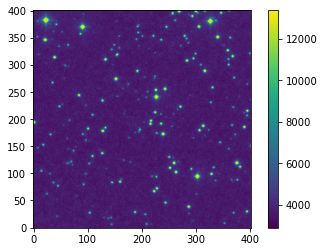

In [11]:
hdu = datasets.load_star_image()  
data = hdu.data[0:401, 0:401] 
plt.imshow(data, origin="lower")
plt.colorbar()
plt.show()

In [12]:
print(np.mean(data), np.median(data), np.std(data))
mean, median, std = sigma_clipped_stats(data, sigma=3.0) 
print((mean, median, std)) 

3823.3159992786113 3666.0 912.2754338803472
(3668.09661145823, 3649.0, 204.41388592022315)


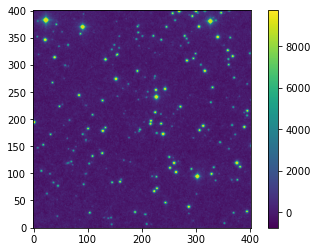

In [19]:
from photutils import DAOStarFinder
daofind = DAOStarFinder(fwhm=3.0, threshold=5.*std) 
sources = daofind(data - median) 
plt.imshow(data - median, origin="lower")
plt.colorbar()
plt.show()

In [30]:
print(sources)

 id     xcentroid      ...        flux                mag         
--- ------------------ ... ------------------ --------------------
  1 144.24756716358587 ...  5.697674747033558  -1.8892441345470474
  2  208.6690686281792 ... 6.7186387597593855   -2.068203227645954
  3  216.9261366551006 ...  1.666276361241887  -0.5543675830260217
  4  351.6251903825918 ...  5.897038488883237   -1.926584905867721
  5  377.5199099575159 ... 1.1178252309515635 -0.12093477013157067
  6  294.2728404665307 ... 1.4809613010679816 -0.42635927535059515
  7  85.21772831944668 ...  1.245708131434075   -0.238540748352036
  8 137.94128566136274 ...  4.683306866094608  -1.6763815378917348
  9 130.32797244529527 ...  2.864122196119612  -1.1424788573859488
 10  143.1104993046545 ... 5.7556336123225735  -1.9002328504047261
...                ... ...                ...                  ...
276  292.5871162673211 ...  4.640950031060139  -1.6665172310283571
277  92.37961989086214 ...   3.63197212325306  -1.400356266222

In [38]:
xdim, ydim = data.shape
x0 = xdim / 2.
y0 = ydim / 2.
print(x0, y0)

200.5 200.5


In [39]:
r = np.sqrt((sources["xcentroid"]- x0)**2 + \
            (sources["ycentroid"] - y0)**2).data

In [27]:
print(r)

[218.31284336 162.11118045 155.54830884  91.35753587  94.34204503
  98.79661521 270.15552594 219.66514153 226.31173793 214.43830551
  89.7465766  307.49170948 154.72840602  91.80310179 248.3954749
  76.65552748 169.81585154  86.22214247 240.96060795  84.09326433
  82.63415526 288.62017853 111.95540516 301.55398929 266.15223577
  55.70485578 318.63232235 123.19566536 123.73756125 123.1646998
 117.79442785 297.12418772 261.14034749 249.78684925 305.07448431
 197.41146806 182.63696709  29.72533919  13.83846435  25.93939534
  35.43435179 180.61370299 115.34122886  38.97843931 123.22884922
  44.49677595  39.85784862 311.05168098 244.98513714  13.78264989
   0.          79.09785355  78.96860197  47.72751802  79.19570976
 326.95326296 269.84665441  51.59518359 207.78930684  31.00532107
  90.2154747   91.32634033  15.30468281  40.72936758 269.93380256
  38.26758432 239.66709421 278.52656952  84.75001778  85.13347347
  20.47547669  35.84468291  38.76438194 235.50269969 164.75771711
  84.9641253

In [46]:
idx = np.where(r >= 100)
print(idx)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  75,  76,  77,  78,
        82,  85,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
        98, 100, 101, 102, 103, 108, 113, 115, 116, 118, 120, 121, 122,
       124, 125, 126, 127, 131, 132, 134, 136, 138, 144, 146, 148, 149,
       151, 152, 153, 155, 159, 162, 163, 173, 175, 176, 179, 182, 185,
       186, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199,
       200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212,
       213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225,
       226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 2

In [47]:
stars = sources[idx]

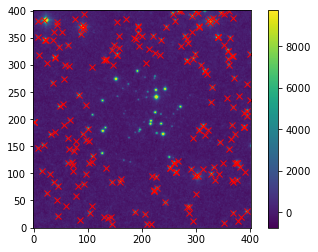

In [48]:
img = plt.imshow(data - median, origin="lower")
for star in stars:
    plt.plot(star["xcentroid"], star["ycentroid"], "xr")
plt.colorbar(img)
plt.show()

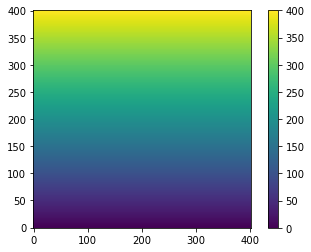

In [55]:
x = np.arange(xdim)
y = np.arange(ydim)
xx, yy = np.meshgrid(x, y)
plt.imshow(yy, origin="lower")
plt.colorbar()
plt.show()
    

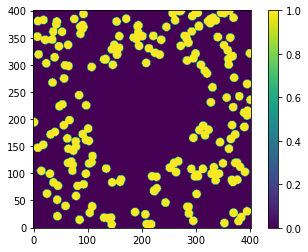

In [61]:
mask = np.zeros_like(data)
rstars = 8
for star in stars:
    r = np.sqrt((xx - star["xcentroid"])**2 + \
               (yy - star["ycentroid"])**2)
    idx = np.where(r < rstars)
    mask[idx] = 1
plt.imshow(mask, origin="lower")
plt.colorbar()
plt.show()

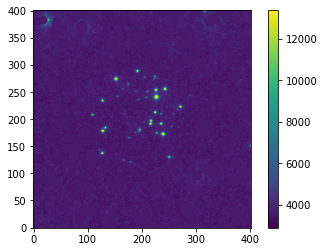

In [62]:
masked_data = data[:]
masked_data[mask==1] = median
plt.imshow(masked_data, origin="lower")
plt.colorbar()
plt.show()